In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading train and test images, train and test targets
train = pd.read_csv('./data/Volcanoes_train/train_images.csv', header=None)
test = pd.read_csv('./data/Volcanoes_test/test_images.csv', header=None)
train_labels = pd.read_csv('./data/Volcanoes_train/train_labels.csv')
test_labels = pd.read_csv('./data/Volcanoes_test/test_labels.csv')

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115


In [4]:
train.shape

(7000, 12100)

In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,...,111,110,109,109,101,106,106,117,130,134
1,93,95,98,100,90,100,108,98,90,103,...,86,93,59,88,89,89,92,99,92,113
2,108,108,92,116,116,140,126,104,112,103,...,118,111,113,107,107,121,141,160,131,138
3,165,164,156,159,151,120,103,114,114,116,...,69,96,109,91,94,83,48,69,86,75
4,105,106,84,115,121,103,94,108,103,91,...,92,89,96,89,91,102,99,90,90,73


In [6]:
test.shape

(2734, 12100)

In [7]:
train_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [8]:
train_labels.shape

(7000, 4)

In [9]:
test_labels.head()

,Volcano?,Type,Radius,Number Volcanoes
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,1,1.0,17.00,1.0
3,0,NaN,NaN,NaN
4,1,3.0,15.13,1.0


In [10]:
test_labels.shape

(2734, 4)

In [11]:
train_labels.columns = ['volcano', 'type', 'radius', 'number']
test_labels.columns = train_labels.columns

In [12]:
train.isnull().sum().sum()

0

In [13]:
test.isnull().sum().sum()

0

In [14]:
train_array = np.resize(train, (len(train), 110, 110))
test_array = np.resize(test, (len(test), 110, 110))
train_array.shape

(7000, 110, 110)

In [15]:
def zero_count(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [16]:
train['zero_count'] = train.apply(zero_count, axis=1)
test['zero_count'] = test.apply(zero_count, axis=1)

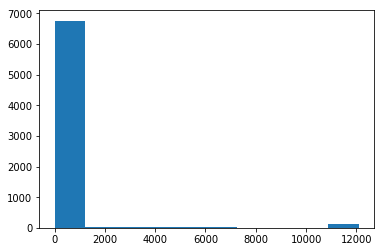

In [17]:
(n, bins, patches) = plt.hist(train.zero_count.sort_values(ascending=False), bins=10)
plt.show()

In [18]:
print(n)

[6760.   12.   22.   13.   16.   17.    7.    9.    8.  136.]


In [19]:
top_10_index = train.loc[train.zero_count <= 10].zero_count.sort_values(ascending=False).head(10).index

In [20]:
train.loc[train.zero_count <= 10].zero_count.sort_values(ascending=False).head(10)

6549    2
3125    1
6999    0
2330    0
2319    0
2320    0
2321    0
2322    0
2323    0
2325    0
Name: zero_count, dtype: int64

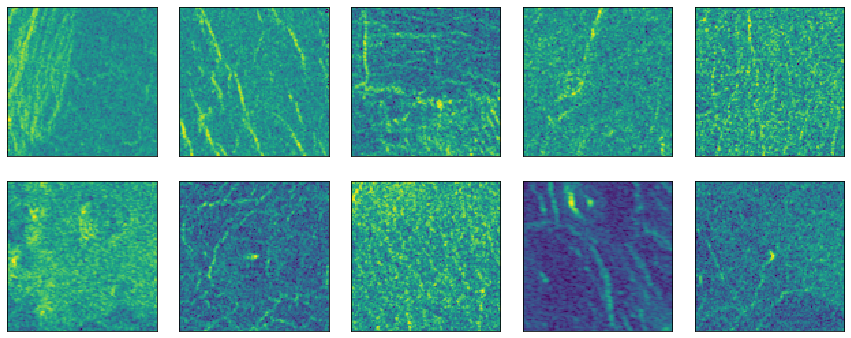

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,6)) 
fig.subplots_adjust(hspace=.15, wspace=.15)
ax = ax.ravel()
for i, j in enumerate(top_10_index): 
    ax[i].imshow(train_array[j])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

In [27]:
train_labels.loc[train_labels.number == 4.0]

,volcano,type,radius,number
425,1,4.0,3.61,4.0
997,1,4.0,2.00,4.0
1061,1,3.0,7.62,4.0
3955,1,4.0,2.83,4.0
5557,1,4.0,2.83,4.0
5668,1,4.0,2.83,4.0
6879,1,3.0,7.07,4.0


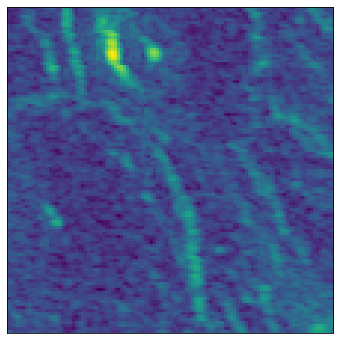

In [44]:
plt.figure(figsize=(6,6))
fig = plt.imshow(train_array[top_10_index[8]])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [22]:
train = train.loc[train.zero_count <= 10]
train.shape

(6731, 12101)

In [23]:
# 107 test rows are corrupted
print(test.loc[test.zero_count < 10].shape)
print(test.shape[0] - test.loc[test.zero_count < 10].shape[0])

(2627, 12101)
107


In [24]:
train.drop(['zero_count'], axis=1, inplace=True)
test.drop(['zero_count'], axis=1, inplace=True)

In [25]:
train_labels.volcano.value_counts(normalize=True)

0    0.857143
1    0.142857
Name: volcano, dtype: float64

In [26]:
test_labels.volcano.value_counts(normalize=True)

0    0.841258
1    0.158742
Name: volcano, dtype: float64

In [27]:
train_labels['number'].value_counts(normalize=True)

1.0    0.814
2.0    0.147
3.0    0.030
4.0    0.007
5.0    0.002
Name: number, dtype: float64

In [28]:
test_labels['number'].value_counts(normalize=True)

1.0    0.827189
2.0    0.145161
3.0    0.027650
Name: number, dtype: float64

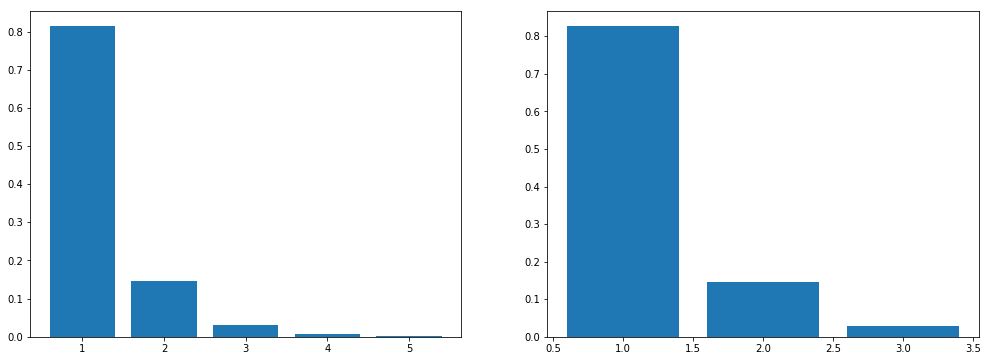

In [29]:
plt.figure(figsize = (17,6))

ax1 = plt.subplot(121)
ax1 = plt.bar(train_labels['number'].value_counts(normalize=True).index, 
              train_labels['number'].value_counts(normalize=True).values);

ax2 = plt.subplot(122)
ax2 = plt.bar(test_labels['number'].value_counts(normalize=True).index, 
              test_labels['number'].value_counts(normalize=True).values);

In [30]:
train_labels['type'].value_counts(normalize=True)

4.0    0.362
3.0    0.346
2.0    0.187
1.0    0.105
Name: type, dtype: float64

In [31]:
test_labels['type'].value_counts(normalize=True)

4.0    0.375576
3.0    0.341014
2.0    0.202765
1.0    0.080645
Name: type, dtype: float64

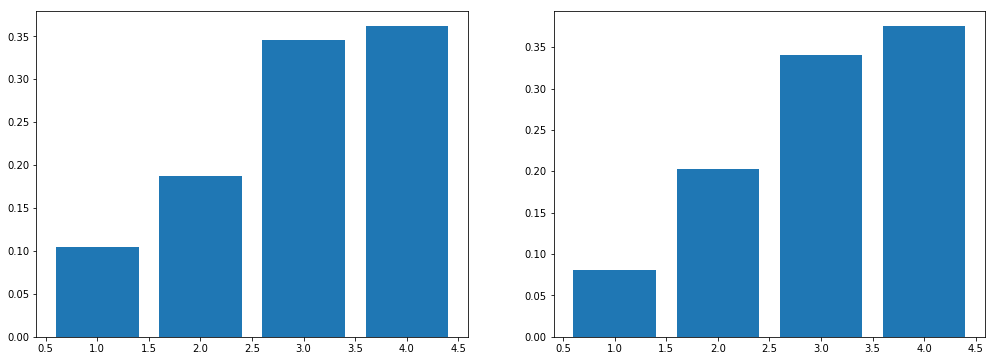

In [32]:
plt.figure(figsize = (17,6))

ax1 = plt.subplot(121)
ax1 = plt.bar(train_labels['type'].value_counts(normalize=True).index, 
              train_labels['type'].value_counts(normalize=True).values);

ax2 = plt.subplot(122)
ax2 = plt.bar(test_labels['type'].value_counts(normalize=True).index, 
              test_labels['type'].value_counts(normalize=True).values);

In [33]:
train_array = np.resize(train, (len(train), 110, 110, 1))
train_array = train_array / 255
test_array = np.resize(test, (2734, 110, 110, 1))
test_array = test_array / 255

In [34]:
train_array.shape

(6731, 110, 110, 1)

In [35]:
y_train = train_labels.drop(['type', 'radius', 'number'], axis=1)
y_train = y_train.loc[train.index]
y_test = test_labels.drop(['type', 'radius', 'number'], axis=1)
y_train.shape

(6731, 1)

In [36]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [37]:
# Initialising the CNN
cnn = Sequential()

# Convolution
cnn.add(Convolution2D(filters=16, kernel_size=(5, 5), input_shape = (110, 110, 1), activation = 'relu'))

# Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
cnn.add(Convolution2D(filters=32, kernel_size=(3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
cnn.add(Flatten())

# SFull connection
cnn.add(Dense(units = 1, activation = 'sigmoid'))

In [38]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    shear_range = .2,
    zoom_range = .2,
    )

In [40]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_array)

In [43]:
# fits the model on batches with real-time data augmentation:
class_weight = {0 : 1,
                1 : 2
               }

cnn.fit_generator(datagen.flow(train_array, y_train, batch_size=32),
                  steps_per_epoch = len(train_array)//32,
                  epochs = 10,
                  verbose = 1, 
                  validation_data = (test_array, y_test), 
                  class_weight = class_weight,
                  workers = 2,
                 )

Epoch 1/10
210/210 [==============================] - 32s 153ms/step - loss: 0.6626 - acc: 0.8539 - val_loss: 0.4691 - val_acc: 0.8413
Epoch 2/10
210/210 [==============================] - 33s 155ms/step - loss: 0.6518 - acc: 0.8542 - val_loss: 0.4519 - val_acc: 0.8413
Epoch 3/10
210/210 [==============================] - 32s 152ms/step - loss: 0.6442 - acc: 0.8567 - val_loss: 0.4862 - val_acc: 0.8413
Epoch 4/10
210/210 [==============================] - 31s 149ms/step - loss: 0.6591 - acc: 0.8515 - val_loss: 0.4908 - val_acc: 0.8413
Epoch 5/10
210/210 [==============================] - 31s 148ms/step - loss: 0.6498 - acc: 0.8543 - val_loss: 0.4536 - val_acc: 0.8413
Epoch 6/10
210/210 [==============================] - 31s 149ms/step - loss: 0.6478 - acc: 0.8537 - val_loss: 0.4483 - val_acc: 0.8413
Epoch 7/10
210/210 [==============================] - 31s 149ms/step - loss: 0.6514 - acc: 0.8527 - val_loss: 0.4739 - val_acc: 0.8413
Epoch 8/10
210/210 [==============================] - 3

In [39]:
#Fitting the CNN to the images
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
# training_set = train_datagen.flow_from_directory(train_array,
#                                                  target_size = (110, 110),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')

# test_set = test_datagen.flow_from_directory(test_array,
#                                             target_size = (110, 110),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

In [53]:
# model 1, filters - 8(5,5) 16(3,3), epochs - 20, class weight - none, 95.68% accuarcy 
# model 2, filters - 8(5,5) 16(3,3), epochs - 20, class weight - 2, 96.34% accuarcy 
# model 3, filters - cleaned train, 8(5,5) 16(3,3), epochs - 15, class weight - 2, 96.20% accuarcy, 83.18% recall
# model 4, filters - cleaned train, 8(5,5) 16(3,3), epochs - 15, class weight - 5, 95.94% accuarcy, 84.33% recall
# model 5, filters - deep layers, cleaned train, 8(5,5) 16(3,3), epochs - 15, class weight - 5, 95.83% accuarcy, 80.88% recall
# model 5, filters - deep layers, cleaned train, 8(5,5) 16(3,3), epochs - 15, class weight - 5, 95.83% accuarcy, 80.88% recall


class_weight = {0 : 1.,
                1 : 5
               }

cnn.fit(x = train_array,
               y = y_train, 
               epochs = 5,
               verbose = 1, 
               validation_data = (test_array, y_test), 
               class_weight = class_weight,
       )

Train on 6731 samples, validate on 2734 samples
Epoch 1/5
6731/6731 [==============================] - 40s 6ms/step - loss: 1.0617e-06 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.9576
Epoch 2/5
6731/6731 [==============================] - 40s 6ms/step - loss: 9.5591e-07 - acc: 1.0000 - val_loss: 0.4912 - val_acc: 0.9579
Epoch 3/5
6731/6731 [==============================] - 39s 6ms/step - loss: 8.3672e-07 - acc: 1.0000 - val_loss: 0.4912 - val_acc: 0.9576
Epoch 4/5
6731/6731 [==============================] - 39s 6ms/step - loss: 7.6023e-07 - acc: 1.0000 - val_loss: 0.4913 - val_acc: 0.9576
Epoch 5/5
6731/6731 [==============================] - 40s 6ms/step - loss: 6.8685e-07 - acc: 1.0000 - val_loss: 0.4922 - val_acc: 0.9576


In [54]:
y_pred = cnn.predict_classes(test_array)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tp - ' + str(tp))
print('tn - ' + str(tn))
print('fp - ' + str(fp))
print('fn - ' + str(fn))

tp - 351
tn - 2267
fp - 33
fn - 83


In [57]:
tp / (tp+fn)

0.8087557603686636

In [58]:
tp / (tp + fp)

0.9140625

In [64]:
cnn.history.history['val_loss']

[0.4874033237199507,
 0.4912287862153868,
 0.49124035444358194,
 0.49128319627184885,
 0.49215016589314986]

In [65]:
cnn.history.history['val_acc']

[0.9575713240673006,
 0.9579370885149964,
 0.9575713240673006,
 0.9575713240673006,
 0.9575713240673006]